In [1]:
#Importing Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from matplotlib import pyplot

In [2]:
data = pd.read_csv('../data/stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
data['bmi'].fillna(float(data['bmi'].mean()), inplace=True)
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
data = data[data.gender != 'Other']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


## Feature Selection for Categorical Inputs
- For Categorical Inputs - Chi-Squared test
- For Numerical Inputs - ANOVA f-test

	----- Categorical features -----
Gender: 0.593885
Hypertension: 37.543917
Heart Disease: 53.968434
Ever Married: 8.411665
Work Type: 1.051452
Residence Type: 0.904399
Smoking Status: 0.814586


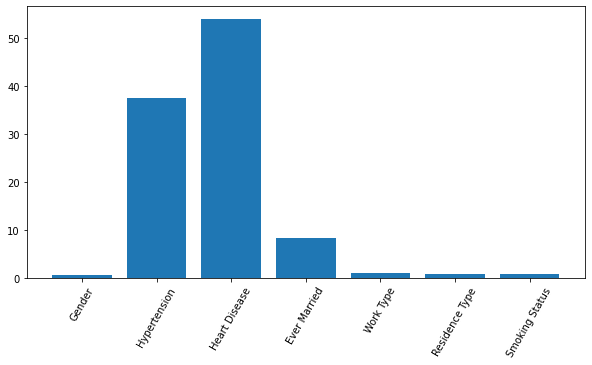

	----- Numerical features -----
Age: 191.656201
Avg Glucose Level: 40.317632
BMI: 6.369227


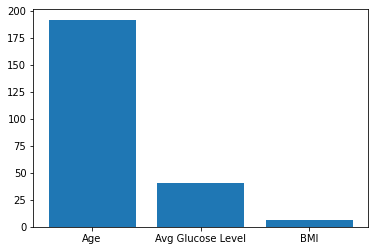

In [7]:
cat_col = ['Gender','Hypertension','Heart Disease','Ever Married','Work Type','Residence Type','Smoking Status']
num_col = ['Age', 'Avg Glucose Level', 'BMI']

def load_data(data):
	dataset = data.values
	cat_X = dataset[:,[1,3,4,5,6,7,10]].astype(str)
	num_X = dataset[:,[2,8,9]]
	y = dataset[:,-1]
	return cat_X, num_X, y

# prepare input data for categorical columns
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target for categorical columns
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# categorical feature selection
def cat_select_features(catX_train, caty_train, catX_test):
	cat_fs = SelectKBest(score_func=chi2, k='all')
	cat_fs.fit(catX_train, caty_train)
	catX_train_fs = cat_fs.transform(catX_train)
	catX_test_fs = cat_fs.transform(catX_test)
	return catX_train_fs, catX_test_fs, cat_fs

# numerical feature selection
def num_select_features(numX_train, numy_train, numX_test):
	num_fs = SelectKBest(score_func=f_classif, k='all')
	num_fs.fit(numX_train, numy_train)
	numX_train_fs = num_fs.transform(numX_train)
	numX_test_fs = num_fs.transform(numX_test)
	return numX_train_fs, numX_test_fs, num_fs

cat_X, num_X, y = load_data(data)

# categorical train-test split
catX_train, catX_test, caty_train, caty_test = train_test_split(cat_X, y, test_size=0.33, random_state=1)
catX_train_enc, catX_test_enc = prepare_inputs(catX_train, catX_test)
caty_train_enc, caty_test_enc = prepare_targets(caty_train, caty_test)
# categorical feature selection
catX_train_fs, catX_test_fs, catfs = cat_select_features(catX_train_enc, caty_train_enc, catX_test_enc)

# numerical train-test split
numX_train, numX_test, numy_train, numy_test = train_test_split(num_X, y, test_size=0.33, random_state=1)
# numerical feature selection
numX_train_fs, numX_test_fs, numfs = num_select_features(numX_train, numy_train, numX_test)

# what are scores for the categorical features
print("\t----- Categorical features -----")
for i in range(len(catfs.scores_)):
	print('%s: %f' % (cat_col[i], catfs.scores_[i]))
# plot the scores
pyplot.figure(figsize=(10,5))
pyplot.bar(cat_col, catfs.scores_)
pyplot.xticks(rotation=60)
pyplot.show()

# what are scores for the numerical features
print("\t----- Numerical features -----")
for i in range(len(numfs.scores_)):
	print('%s: %f' % (num_col[i], numfs.scores_[i]))
# plot the scores
pyplot.bar(num_col, numfs.scores_)
pyplot.show()